# PROJECT 3

## Importing Libraries

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Loading Dataset to be used

In [179]:
main_data=pd.read_csv('data.csv')
main_data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,No,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,Yes,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,Yes,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,Yes,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,Yes,No,No,1,0


# EDA
## Preparing exploratory data analysis (EDA) using the dataset

In [180]:
# The size of Data set
print('The size of the main_data data is :', main_data.size)

# Show dimension of the data
print("Dimension: {}".format(main_data.shape))


The size of the main_data data is : 651304
Dimension: (38312, 17)


* The size of dataset been used is 651304 which is made up of the number of rows times the number of columns

* The dataset is made up of of 38312 observations and 17 features,

In [181]:
print(main_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 17 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
Foreign_schooled                       38312 non-null object
Past_Disciplinary_Action               38312 non-null object
Previous_IntraDepartmental_Movement    383

## Summary Statistics for Features 

In [182]:
main_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmployeeNo,38312,38312,YAK/S/41089,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Division,38312,9,Commercial Sales and Marketing,11695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Qualification,36633,3,First Degree or HND,25578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,38312,2,Male,26880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel_of_Recruitment,38312,3,Agency and others,21310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trainings_Attended,38312,NaN,NaN,NaN,2.25368,0.609443,2,2,2,2,11
Year_of_birth,38312,NaN,NaN,NaN,1986.21,7.64605,1950,1982,1988,1992,2001
Last_performance_score,38312,NaN,NaN,NaN,7.69896,3.74414,0,5,7.5,10,12.5
Year_of_recruitment,38312,NaN,NaN,NaN,2013.14,4.26145,1982,2012,2014,2016,2018
Targets_met,38312,NaN,NaN,NaN,0.352996,0.477908,0,0,0,1,1


In [183]:
### extracting the the numeric data needed for correlation
num_data=main_data.drop(['EmployeeNo','Division', 'Qualification', 'Gender','Channel_of_Recruitment','Year_of_birth',
        'Channel_of_Recruitment', 
        'Year_of_birth',
         'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Foreign_schooled',
       'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement',
       'No_of_previous_employers', 'Promoted_or_Not'], axis=1)
num_data.head()

,Trainings_Attended,Last_performance_score,Training_score_average
0,2,12.5,41
1,2,12.5,52
2,2,7.5,42
3,3,2.5,42
4,3,7.5,77


In [184]:
num_data.corr()

,Trainings_Attended,Last_performance_score,Training_score_average
Trainings_Attended,1.000000,-0.062042,0.041065
Last_performance_score,-0.062042,1.000000,0.057836
Training_score_average,0.041065,0.057836,1.000000


In [185]:
num_data.cov()

,Trainings_Attended,Last_performance_score,Training_score_average
Trainings_Attended,0.371420,-0.141570,0.334429
Last_performance_score,-0.141570,14.018551,2.893663
Training_score_average,0.334429,2.893663,178.562837


Text(0.5, 1, 'Heatmap')

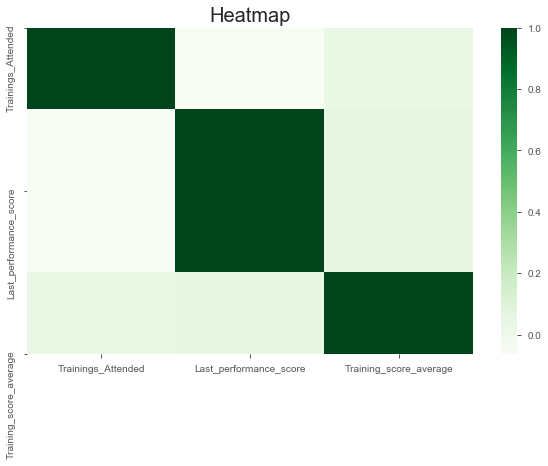

In [186]:
import matplotlib.style as style
style.use('ggplot')

plt.figure(figsize=(10,6))
sns.heatmap(num_data.corr(),cmap='Greens',annot=False)
plt.title('Heatmap', fontsize=20)

Text(0.5, 1, 'Heatmap')

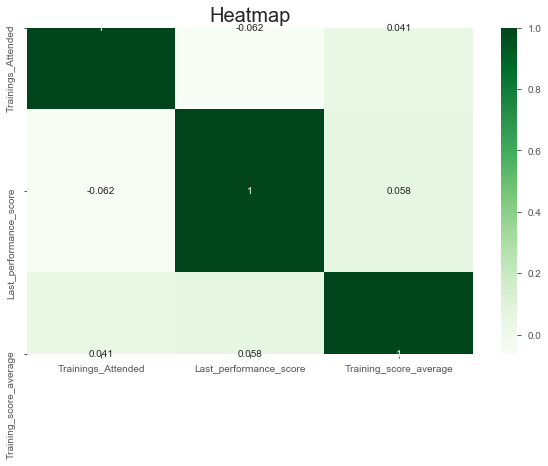

In [187]:
import matplotlib.style as style
style.use('ggplot')

plt.figure(figsize=(10,6))
sns.heatmap(num_data.corr(),cmap='Greens',annot=True)
plt.title('Heatmap', fontsize=20)

In [188]:
num_data.columns

Index(['Trainings_Attended', 'Last_performance_score',
       'Training_score_average'],
      dtype='object')

## Plotting a boxplot for Training score average and Last performance score

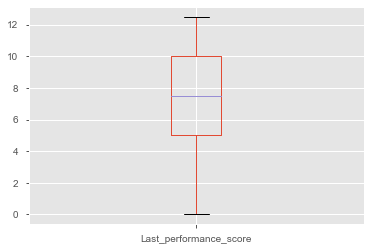

In [189]:
num_data.boxplot(column=['Last_performance_score'])

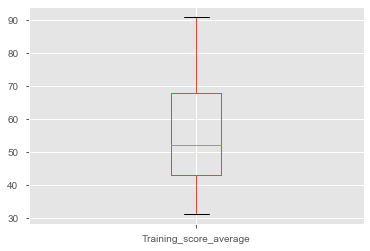

In [190]:
num_data.boxplot(['Training_score_average'])

## KDE plot for Last performance score, Training score average and Trainings Attended

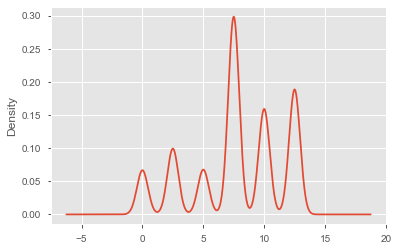

In [191]:
num_data.Last_performance_score.plot.kde()

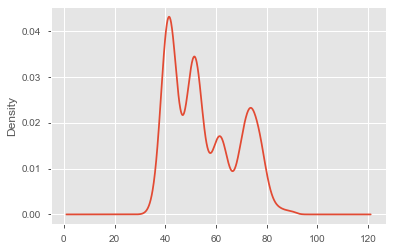

In [192]:
num_data.Training_score_average.plot.kde()

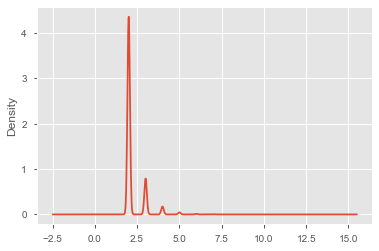

In [193]:
num_data.Trainings_Attended.plot.kde()

In [194]:
import pandas_profiling

In [195]:
profile = main_data.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
profile

In [196]:
## missing values
main_data.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
Foreign_schooled                          0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

#### Checking to see the qualification with the most observations (count)

In [197]:
main_data['Qualification'].describe()


count                   36633
unique                      3
top       First Degree or HND
freq                    25578
Name: Qualification, dtype: object

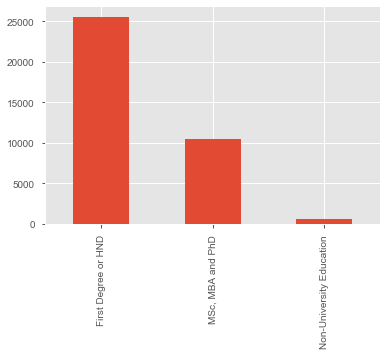

In [198]:
main_data['Qualification'].value_counts().plot(kind='bar')

In [199]:
## replace missing values with the most occurring qualification
main_data1=main_data.fillna('First Degree or HND')
main_data1.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,No,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,Yes,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,Yes,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,Yes,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,Yes,No,No,1,0


In [200]:
main_data1.isnull().sum()

EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
Foreign_schooled                       0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
dtype: int64

In [201]:
main_data['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

## Engineering New Features

### Creating features for Years of recruitment and Years in company

In [202]:
main_data1['Years_in_company']=2019 - main_data['Year_of_recruitment']
main_data1['Age']=2019 - main_data['Year_of_birth']
main_data1.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Years_in_company,Age
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,No,No,No,0,0,8,33
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,Yes,No,No,0,0,4,28


In [203]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 17 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
Foreign_schooled                       38312 non-null object
Past_Disciplinary_Action               38312 non-null object
Previous_IntraDepartmental_Movement    383

In [204]:
main_data1.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'Foreign_schooled',
       'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement',
       'No_of_previous_employers', 'Promoted_or_Not', 'Years_in_company',
       'Age'],
      dtype='object')

#### Creating whether or not an employee started his/her career at the company

In [205]:
main_data1['Entry at company']=np.where(main_data1['No_of_previous_employers']=='0','Yes','No')

In [206]:
main_data1.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Years_in_company,Age,Entry at company
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,No,No,No,0,0,8,33,Yes
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,Yes,No,No,0,0,4,28,Yes


#### Using last performance score of an employee and whether or not they met their target to determine their dedication level

An employee is said to be  dedicated if they scored 7 and above in their last performance assessment and also met their target

In [207]:
for i, row in main_data1.iterrows():
    if (main_data1.loc[i, 'Last_performance_score']>6 and main_data1.loc[i, 'Targets_met']==1):
        main_data1.loc[i, 'Dedication']='Dedicated'
    else:
        main_data1.loc[i, 'Dedication']='Not dedicated'

In [208]:
main_data1.head(1)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Years_in_company,Age,Entry at company,Dedication
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,...,41,No,No,No,0,0,8,33,Yes,Dedicated


In [209]:
main_data1.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmployeeNo,38312,38312,YAK/S/41089,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Division,38312,9,Commercial Sales and Marketing,11695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Qualification,38312,3,First Degree or HND,27257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,38312,2,Male,26880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel_of_Recruitment,38312,3,Agency and others,21310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trainings_Attended,38312,NaN,NaN,NaN,2.25368,0.609443,2,2,2,2,11
Year_of_birth,38312,NaN,NaN,NaN,1986.21,7.64605,1950,1982,1988,1992,2001
Last_performance_score,38312,NaN,NaN,NaN,7.69896,3.74414,0,5,7.5,10,12.5
Year_of_recruitment,38312,NaN,NaN,NaN,2013.14,4.26145,1982,2012,2014,2016,2018
Targets_met,38312,NaN,NaN,NaN,0.352996,0.477908,0,0,0,1,1


### Dropping Employee ID from the data

In [210]:
main_data1.drop('EmployeeNo', axis=1, inplace=True)

In [211]:
main_data1.head(1)

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Years_in_company,Age,Entry at company,Dedication
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,No,No,No,0,0,8,33,Yes,Dedicated


### Selecting Objects from the Dataset

In [212]:
obj_maindata=main_data1.select_dtypes(include=['object'])

obj_maindata.head(1)

,Division,Qualification,Gender,Channel_of_Recruitment,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Entry at company,Dedication
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,No,No,No,0,Yes,Dedicated


### Applying One Hot Encoding to the Dataset

In [213]:
Obj_data_dummies = pd.get_dummies(obj_maindata)
Obj_data_dummies.head(1)

,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Qualification_First Degree or HND,...,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5,Entry at company_No,Entry at company_Yes,Dedication_Dedicated,Dedication_Not dedicated
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


### Dropping objects and Merging Dataset

In [214]:
# Droping Objects from the main data
main_data2 = main_data1.select_dtypes(exclude=['object'])

# Merging Encoded data to the data without objects
data_model = pd.concat([main_data2, Obj_data_dummies], axis=1)

In [215]:
data_model.head(1)

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Years_in_company,Age,...,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5,Entry at company_No,Entry at company_Yes,Dedication_Dedicated,Dedication_Not dedicated
0,2,1986,12.5,2011,1,0,41,0,8,33,...,0,0,0,0,0,0,0,1,1,0


In [216]:
data_model.columns

Index(['Trainings_Attended', 'Year_of_birth', 'Last_performance_score',
       'Year_of_recruitment', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'Promoted_or_Not', 'Years_in_company', 'Age',
       'Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing',
       'Qualification_First Degree or HND', 'Qualification_MSc, MBA and PhD',
       'Qualification_Non-University Education', 'Gender_Female',
       'Gender_Male', 'Channel_of_Recruitment_Agency and others',
       'Channel_of_Recruitment_Direct Internal process',
       'Channel_of_Recruitment_Referral and Special candidates',
       'Foreign_schooled_No', 'F

### Dropping Year of Birth and Year of Recruitment from the data

In [217]:
main_data_with_only_features=data_model.drop(['Year_of_birth','Year_of_recruitment'], axis=1)
main_data_with_only_features.head(2)

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Years_in_company,Age,Division_Business Finance Operations,Division_Commercial Sales and Marketing,...,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5,Entry at company_No,Entry at company_Yes,Dedication_Dedicated,Dedication_Not dedicated
0,2,12.5,1,0,41,0,8,33,0,1,...,0,0,0,0,0,0,0,1,1,0
1,2,12.5,0,0,52,0,4,28,0,0,...,0,0,0,0,0,0,0,1,0,1


## Checking for imbalance in the dataset

### loading Dependencies

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Representing the imbalances in percentage and looking at the distribution

In [219]:
print('Not Promoted is', round(main_data_with_only_features['Promoted_or_Not'].value_counts()[0]/len(main_data1) * 100,2), '% of the dataset')
print('Promoted is', round(main_data_with_only_features['Promoted_or_Not'].value_counts()[1]/len(main_data1) * 100,2), '% of the dataset')

Not Promoted is 91.54 % of the dataset
Promoted is 8.46 % of the dataset


About 8.5% were balanced and 91.5% imbalanced 

Text(0.5, 1.0, 'Promotion Distributions \n (0: Not Promoted || 1: Promoted)')

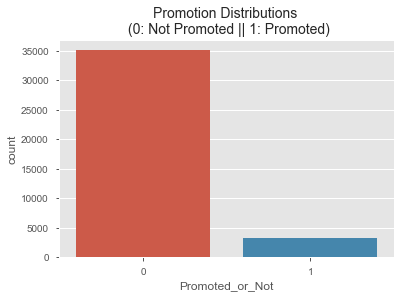

In [220]:
sns.countplot('Promoted_or_Not', data=main_data_with_only_features)
plt.title('Promotion Distributions \n (0: Not Promoted || 1: Promoted)', fontsize=14)

In [221]:
main_data_with_only_features.columns

Index(['Trainings_Attended', 'Last_performance_score', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'Promoted_or_Not',
       'Years_in_company', 'Age', 'Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing',
       'Qualification_First Degree or HND', 'Qualification_MSc, MBA and PhD',
       'Qualification_Non-University Education', 'Gender_Female',
       'Gender_Male', 'Channel_of_Recruitment_Agency and others',
       'Channel_of_Recruitment_Direct Internal process',
       'Channel_of_Recruitment_Referral and Special candidates',
       'Foreign_schooled_No', 'Foreign_schooled_Yes',
       'Past_Disciplinary

(31, 91)

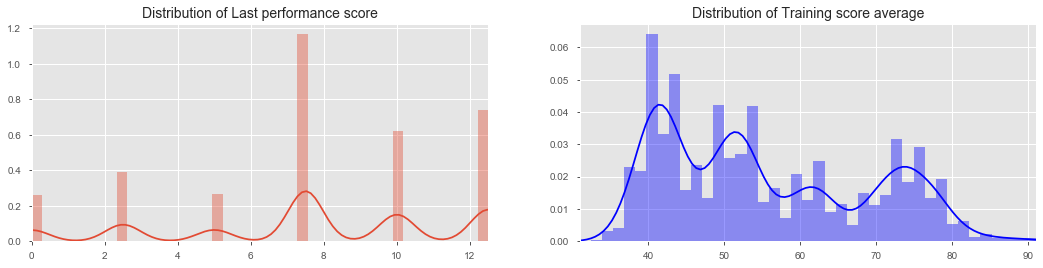

In [222]:
## investigating how skewed the data is


fig, ax = plt.subplots(1,2, figsize=(18,4))

perf_val = main_data_with_only_features['Last_performance_score'].values
score_val = main_data_with_only_features['Training_score_average'].values

sns.distplot(perf_val, ax=ax[0])
ax[0].set_title('Distribution of Last performance score', fontsize=14)
ax[0].set_xlim([min(perf_val), max(perf_val)])


sns.distplot(score_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Training score average', fontsize=14)
ax[1].set_xlim([min(score_val), max(score_val)])


#### Removing all object variables/features from data.

This is done because, object variables/features cannot be used in the regression model and also, it has already been encoded.

In [223]:
Reg_main_data_with_only_features = main_data_with_only_features.select_dtypes(exclude=['object'])

In [224]:
Reg_main_data_with_only_features.head()

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Years_in_company,Age,Division_Business Finance Operations,Division_Commercial Sales and Marketing,...,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5,Entry at company_No,Entry at company_Yes,Dedication_Dedicated,Dedication_Not dedicated
0,2,12.5,1,0,41,0,8,33,0,1,...,0,0,0,0,0,0,0,1,1,0
1,2,12.5,0,0,52,0,4,28,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2,7.5,0,0,42,0,7,32,0,1,...,0,0,0,0,0,0,0,1,0,1
3,3,2.5,0,0,42,0,10,37,0,1,...,1,0,0,0,0,0,1,0,0,1
4,3,7.5,0,0,77,0,7,29,0,0,...,1,0,0,0,0,0,1,0,0,1


#### Splitting the dataset into two
#### Splitting data into target and independent variables 

In [225]:
Y=Reg_main_data_with_only_features["Promoted_or_Not"]
X=Reg_main_data_with_only_features.drop(['Promoted_or_Not'], axis = 1)

#### Splitting Data into 80% train and 20% test with a random seed of 42

In [226]:
x_Train, x_Test, y_Train, y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#### Turn into an array

In [227]:

x_Train = x_Train.values
x_Test = x_Test.values
y_Train = y_Train.values
y_Test = y_Test.values


#### Checking if both the train and test label distribution are similarly distributed

In [228]:

train_unique_label, train_counts_label = np.unique(y_Train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_Test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_Train))
print(test_counts_label/ len(y_Test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.91601684 0.08398316]
[0.91295837 0.08704163]


#### Fittting  Model 

In [229]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Printing Coeffiecient for each feature used in model 

In [230]:
reg.coef_

array([-4.61991301e-03,  3.75212591e-03,  1.09806103e-01,  2.18671006e-01,
        2.29201230e-02,  1.12172684e-03, -1.38236933e-03,  1.38790258e-01,
        3.87470509e-01,  1.49433775e-01, -2.75522090e-01, -4.05213921e-01,
        3.65706483e-01,  1.39113843e-01, -4.36471879e-01, -6.33069770e-02,
       -6.52898569e-03,  4.47621957e-03,  2.05276613e-03, -8.68865706e-05,
        8.68865705e-05, -1.71836406e-03, -1.66993684e-03,  3.38830090e-03,
       -2.25249858e-03,  2.25249858e-03, -1.07826574e-02,  1.07826574e-02,
        2.91810349e-03, -2.91810349e-03,  6.38307075e-04,  5.48967176e-03,
       -2.94442114e-03,  8.34275181e-03,  2.84432201e-03, -1.38993794e-02,
       -4.71252078e-04, -6.38307075e-04,  6.38307075e-04, -2.07131611e-04,
        2.07131611e-04])

#### Making Prediction for test data 

In [231]:
# Modeling the data 
# Train model
lr = LogisticRegression(solver='liblinear').fit(x_Train, y_Train)
 

lr_pred = lr.predict(x_Test)

#### Checking accuracy

In [232]:
accuracy_score(y_Test, lr_pred)

0.9265300796032885

#### Checking unique values

In [233]:
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    7501
1     162
Name: 0, dtype: int64

#### Printing F1 score and Recall score

In [234]:
# f1 score
print(f1_score(y_Test, lr_pred))

# recall score
print(recall_score(y_Test, lr_pred))

0.3208685162846804
0.19940029985007496


#### classification report

In [235]:
labels = ['No Promotion', 'Promotion']
print(classification_report(y_Test, lr_pred,target_names=labels))

              precision    recall  f1-score   support

No Promotion       0.93      1.00      0.96      6996
   Promotion       0.82      0.20      0.32       667

    accuracy                           0.93      7663
   macro avg       0.87      0.60      0.64      7663
weighted avg       0.92      0.93      0.91      7663



### Changing the algorithm


In [236]:
from sklearn.ensemble import RandomForestClassifier

# train model
RFC = RandomForestClassifier(n_estimators=10).fit(x_Train, y_Train)

In [237]:
# predict on test set
RFC_pred = RFC.predict(x_Test)

In [238]:
accuracy_score(y_Test, RFC_pred)

0.9244421244943234

In [239]:
f1_score(y_Test, RFC_pred)

0.35451505016722407

In [240]:
recall_score(y_Test, RFC_pred)

0.2383808095952024

### Undersampling Technique

In [241]:
Reg_main_data_with_only_features['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

#### creating a copy of dataset

In [242]:
data_sample = Reg_main_data_with_only_features.copy()

data_resample = data_sample.sample(frac=1)

In [243]:
# amount of promoted classes are  3241 rows.
Promoted_data_resample = data_resample.loc[data_resample['Promoted_or_Not'] == 1]
Not_Promoted_data_resample = data_resample.loc[data_resample['Promoted_or_Not'] == 0][:3241]

normal_distributed_data_resample = pd.concat([Promoted_data_resample, Not_Promoted_data_resample])

# Shuffle dataframe rows
new_data_resample = normal_distributed_data_resample.sample(frac=1, random_state=42)

new_data_resample.head()

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Years_in_company,Age,Division_Business Finance Operations,Division_Commercial Sales and Marketing,...,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5,Entry at company_No,Entry at company_Yes,Dedication_Dedicated,Dedication_Not dedicated
7860,2,10.0,0,0,44,0,7,32,0,1,...,0,1,0,0,0,0,1,0,0,1
19257,2,2.5,0,0,59,0,9,33,0,0,...,1,0,0,0,0,0,1,0,0,1
2237,2,7.5,0,1,88,1,4,33,0,0,...,1,0,0,0,0,0,1,0,0,1
24065,2,5.0,0,0,63,1,2,26,0,0,...,1,0,0,0,0,0,1,0,0,1
6021,2,12.5,1,0,39,0,13,37,0,1,...,1,0,0,0,0,0,1,0,1,0


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Promoted_or_Not, dtype: float64


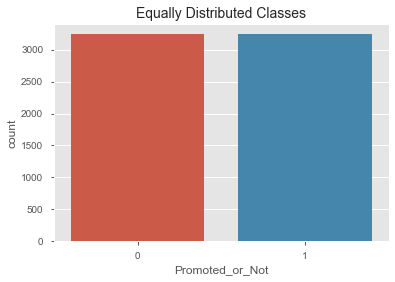

In [244]:
print('Distribution of the Classes in the subsample dataset')
print(new_data_resample['Promoted_or_Not'].value_counts()/len(new_data_resample))



sns.countplot('Promoted_or_Not', data=new_data_resample)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### Fitting the model for Undersampling

In [245]:

X1 = new_data_resample.drop('Promoted_or_Not', axis=1)
y1 = new_data_resample['Promoted_or_Not']

In [246]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#### Turning the values into an array for feeding the classification algorithms.

In [247]:
'''X1_train = X1_train.values
X1_test = X1_test.values
y1_train = y1_train.values
y1_test = y1_test.values'''

lr = LogisticRegression(solver='liblinear').fit(X1_train, y1_train)
 
# Predict on training set
lr_pred1 = lr.predict(X1_test)

print(accuracy_score(y1_test, lr_pred1))

# f1 score
print(f1_score(y1_test, lr_pred1))


# recall score
print(recall_score(y1_test, lr_pred1))

0.7787201233616037
0.7875647668393783
0.7916666666666666


#### Classification Report

In [248]:
labels = ['No Promotion', 'Promotion']
print(classification_report(y1_test, lr_pred1,target_names=labels))

              precision    recall  f1-score   support

No Promotion       0.77      0.76      0.77       625
   Promotion       0.78      0.79      0.79       672

    accuracy                           0.78      1297
   macro avg       0.78      0.78      0.78      1297
weighted avg       0.78      0.78      0.78      1297



### Classifiers for Undersampling

#### Implementing  classifiers

In [249]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "xgBoost classifier ":XGBClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [250]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X1_train, y1_train)
    training_score = cross_val_score(classifier, X1_train, y1_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 77.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 79.0 % accuracy score
Classifiers:  SVC Has a training score of 65.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 80.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 75.0 % accuracy score


## Oversampling Technique

In [251]:
Reg_main_data_with_only_features['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

##### We will split into test and train sets BEFORE trying oversampling techniques! 
##### Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets

In [252]:
from sklearn.utils import resample

# Separate input features and target
y2 = Reg_main_data_with_only_features.Promoted_or_Not
X2= Reg_main_data_with_only_features.drop('Promoted_or_Not', axis=1)

# setting up testing and training sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

# concatenate our training data back together
X2 = pd.concat([X2_train, y2_train], axis=1)

# separate minority and majority classes
not_promoted = X2[X2.Promoted_or_Not==0]
promoted = X2[X2.Promoted_or_Not==1]

# upsample minority
promoted_upsampled = resample(promoted,
                          replace=True, # sample with replacement
                          n_samples=len(not_promoted), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
Oversampled = pd.concat([not_promoted, promoted_upsampled])

# check new class counts
Oversampled.Promoted_or_Not.value_counts()

1    28075
0    28075
Name: Promoted_or_Not, dtype: int64

In [253]:
# trying logistic regression again with the balanced dataset
y2_train = Oversampled.Promoted_or_Not
X2_train = Oversampled.drop('Promoted_or_Not', axis=1)

lr2 = LogisticRegression(solver='liblinear').fit(X2_train, y2_train)

Oversampled_pred = lr2 .predict(X2_test)

# Checking accuracy
print("The Accuracy is",accuracy_score(y2_test, Oversampled_pred))
    
# f1 score
print("The F1 Score is",f1_score(y2_test, Oversampled_pred))

# recall score  
print("The recall score is",recall_score(y2_test, Oversampled_pred))

The Accuracy is 0.7558397494453869
The F1 Score is 0.36597763470010164
The recall score is 0.8095952023988006


#### Classification Report

In [254]:
labels = ['No Promotion', 'Promotion']
print(classification_report(y2_test, Oversampled_pred,target_names=labels))

              precision    recall  f1-score   support

No Promotion       0.98      0.75      0.85      6996
   Promotion       0.24      0.81      0.37       667

    accuracy                           0.76      7663
   macro avg       0.61      0.78      0.61      7663
weighted avg       0.91      0.76      0.81      7663



### Classifiers for Oversampling

#### Implementing  classifiers

In [255]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "xgBoost classifier ":XGBClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [256]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X2_train, y2_train)
    training_score1 = cross_val_score(classifier, X2_train, y2_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 75.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 75.0 % accuracy score
Classifiers:  SVC Has a training score of 75.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 75.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 75.0 % accuracy score


## Synthetic Minority Oversampling Technique (SMOTE)

#### SMOTE is similar to the Oversampling Technique but it uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model

In [257]:
from imblearn.over_sampling import SMOTE

In [258]:
# Separate input features and target
y3 = Reg_main_data_with_only_features.Promoted_or_Not
X3= Reg_main_data_with_only_features.drop('Promoted_or_Not', axis=1)

# setting up testing and training sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=42)

sm = SMOTE(random_state=42)
X3_train, y3_train = sm.fit_sample(X3_train, y3_train)

### Binary Logistic Regression

In [259]:
smote = LogisticRegression(solver='liblinear').fit(X3_train, y3_train)

smote_pred = smote.predict(X3_test)

# Checking accuracy
log_acc=accuracy_score(y3_test, smote_pred)
print("The model accuracy is", log_acc)

# f1 score
log_f1= f1_score(y3_test, smote_pred, average ='macro')
print("The F1 Score is",log_f1)

# Recal score
log_recal=recall_score(y3_test, smote_pred,average='macro')
print("The Recal score is", log_recal)

# Precision score
log_pre=precision_score(y3_test, smote_pred,average='macro')
print("The Precision score is", log_pre)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(smote, X3_train, y3_train, cv = 5))

The model accuracy is 0.9164817956413938
The F1 Score is 0.6537950453566668
The Recal score is 0.6199287791781639
The Precision score is 0.7374540793335997
Cross_Val_Score : [0.78771149 0.9666073  0.9682992  0.96562778 0.96580588]


In [260]:
# Confusion Matrix
conf_mat = confusion_matrix(y3_test,smote_pred)
print('Confusion matrix:\n', conf_mat)


Confusion matrix:
 [[6849  147]
 [ 493  174]]


In [261]:
labels = ['No Promotion', 'Promotion']
print(classification_report(y3_test, smote_pred,target_names=labels))

              precision    recall  f1-score   support

No Promotion       0.93      0.98      0.96      6996
   Promotion       0.54      0.26      0.35       667

    accuracy                           0.92      7663
   macro avg       0.74      0.62      0.65      7663
weighted avg       0.90      0.92      0.90      7663



### Focusing on Support Vector Machine

In [262]:
# Building a basic SVM model using the SVC method
supportvector = SVC(random_state=42, decision_function_shape='ovr', probability=False, 
                    gamma='scale', kernel='sigmoid')
supportvector.fit(X3_train, y3_train)
s_predict = supportvector.predict(X3_test)

# Checking accuracy
svm_acc=accuracy_score(y3_test, s_predict)
print("The model accuracy is", svm_acc)

# f1 score
svm_f1= f1_score(y3_test, s_predict, average ='macro')
print("The F1 Score is",svm_f1)

# Recal score
svm_recal=recall_score(y3_test, s_predict,average='macro')
print("The Recal score is", svm_recal)

# Precision score
svm_pre=precision_score(y3_test, s_predict,average='macro')
print("The Precision score is", svm_pre)


# Confusion Matrix
conf_mat = confusion_matrix(y3_test,s_predict)
print('Confusion matrix:\n', conf_mat)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(supportvector,X3_train,y3_train, cv=5))

labels = ['No Promotion', 'Promotion']
print(classification_report(y3_test, s_predict,target_names=labels))

The model accuracy is 0.42189742920527207
The F1 Score is 0.3404402855914941
The Recal score is 0.414162665665452
The Precision score is 0.47229607942410057
Confusion matrix:
 [[2963 4033]
 [ 397  270]]
Cross_Val_Score : [0.42689225 0.43205699 0.42840606 0.42715939 0.59029386]
              precision    recall  f1-score   support

No Promotion       0.88      0.42      0.57      6996
   Promotion       0.06      0.40      0.11       667

    accuracy                           0.42      7663
   macro avg       0.47      0.41      0.34      7663
weighted avg       0.81      0.42      0.53      7663



### Focusing on Random Forest Classifier

In [263]:
# Building a basic random forest using the RandomForestClassifier method
randomforest = RandomForestClassifier(random_state=42, n_estimators=1000, 
                                      criterion= 'gini', oob_score=True)
randomforest=randomforest.fit(X3_train, y3_train)
rfc_predict = randomforest.predict(X3_test)

# Checking accuracy
rf_acc=accuracy_score(y3_test, rfc_predict)
print("The model accuracy is", rf_acc)

# f1 score
rf_f1= f1_score(y3_test, rfc_predict, average ='macro')
print("The F1 Score is",rf_f1)

# Recal score
rf_recal=recall_score(y3_test, rfc_predict,average='macro')
print("The Recal score is", rf_recal)

# Precision score
rf_pre=precision_score(y3_test, rfc_predict,average='macro')
print("The Precision score is", rf_pre)


# Confusion Matrix
conf_mat = confusion_matrix(y3_test,rfc_predict)
print('Confusion matrix:\n', conf_mat)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(randomforest,X3_train,y3_train, cv=5))

print(classification_report(y3_test, rfc_predict,target_names=labels))

The model accuracy is 0.9185697507503588
The F1 Score is 0.6539547065862855
The Recal score is 0.6176815108740655
The Precision score is 0.752645889692486
Confusion matrix:
 [[6870  126]
 [ 498  169]]
Cross_Val_Score : [0.84078362 0.98664292 0.98967053 0.98744435 0.98833482]
              precision    recall  f1-score   support

No Promotion       0.93      0.98      0.96      6996
   Promotion       0.57      0.25      0.35       667

    accuracy                           0.92      7663
   macro avg       0.75      0.62      0.65      7663
weighted avg       0.90      0.92      0.90      7663



### Feature Importance for Random Forest Classification

In [264]:
Features= ['Trainings_Attended', 'Last_performance_score', 'Targets_met',
       'Previous_Award', 'Training_score_average',
       'Years_in_company', 'Age', 'Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing',
       'Qualification_First Degree or HND', 'Qualification_MSc, MBA and PhD',
       'Qualification_Non-University Education', 'Gender_Female',
       'Gender_Male', 'Channel_of_Recruitment_Agency and others',
       'Channel_of_Recruitment_Direct Internal process',
       'Channel_of_Recruitment_Referral and Special candidates',
       'Foreign_schooled_No', 'Foreign_schooled_Yes',
       'Past_Disciplinary_Action_No', 'Past_Disciplinary_Action_Yes',
       'Previous_IntraDepartmental_Movement_No',
       'Previous_IntraDepartmental_Movement_Yes', 'No_of_previous_employers_0',
       'No_of_previous_employers_1', 'No_of_previous_employers_2',
       'No_of_previous_employers_3', 'No_of_previous_employers_4',
       'No_of_previous_employers_5', 'No_of_previous_employers_More than 5',
       'Entry at company_No', 'Entry at company_Yes', 'Dedication_Dedicated',
       'Dedication_Not dedicated']

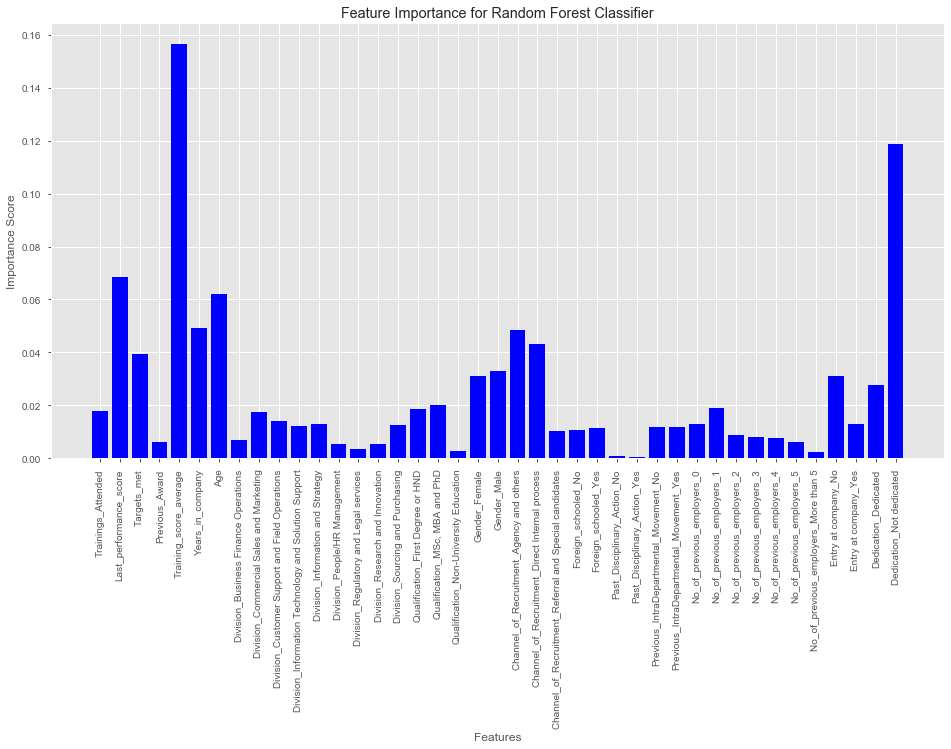

In [265]:
plt.style.use('ggplot')

rf_col = Features
rf_scores = randomforest.feature_importances_

rf_pos = [i for i, _ in enumerate(rf_col)]

plt.figure(figsize=(16,8))
plt.bar(rf_pos, rf_scores, color='blue')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for Random Forest Classifier")
plt.xticks(rf_pos,rf_col,rotation=90)

plt.show()  

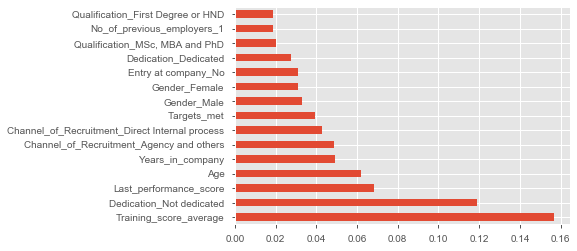

In [266]:
feat_importance = pd.Series(randomforest.feature_importances_, index = Features)
feat_importance.nlargest(15).plot(kind='barh')

### Focusing on Basic Decision Tree Classifier

In [267]:
# Implementing a basic decision tree using DecisionTreeClassifier method
decisionTree = DecisionTreeClassifier(random_state=42,splitter='random', max_depth=9,
                                      criterion='gini', max_features='auto')
decisionTree = decisionTree.fit(X3_train, y3_train)
dtc_predict = decisionTree.predict(X3_test)

# Checking accuracy
dt_acc=accuracy_score(y3_test, dtc_predict)
print("The model accuracy is", dt_acc)

# f1 score
dt_f1= f1_score(y3_test, dtc_predict, average ='macro')
print("The F1 Score is",dt_f1)

# Recal score
dt_recal=recall_score(y3_test, dtc_predict,average='macro')
print("The Recal score is", dt_recal)

# Precision score
dt_pre=precision_score(y3_test, dtc_predict,average='macro')
print("The Precision score is", dt_pre)


# Confusion Matrix
conf_mat = confusion_matrix(y3_test,dtc_predict)
print('Confusion matrix:\n', conf_mat)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(decisionTree,X3_train,y3_train, cv=5))

print(classification_report(y3_test, dtc_predict,target_names=labels))

The model accuracy is 0.8580190525903693
The F1 Score is 0.5604647357224677
The Recal score is 0.5614624077326688
The Precision score is 0.559531904753602
Confusion matrix:
 [[6440  556]
 [ 532  135]]
Cross_Val_Score : [0.72128228 0.8411398  0.83294746 0.83410508 0.82591273]
              precision    recall  f1-score   support

No Promotion       0.92      0.92      0.92      6996
   Promotion       0.20      0.20      0.20       667

    accuracy                           0.86      7663
   macro avg       0.56      0.56      0.56      7663
weighted avg       0.86      0.86      0.86      7663



### Plotting Feature Importance

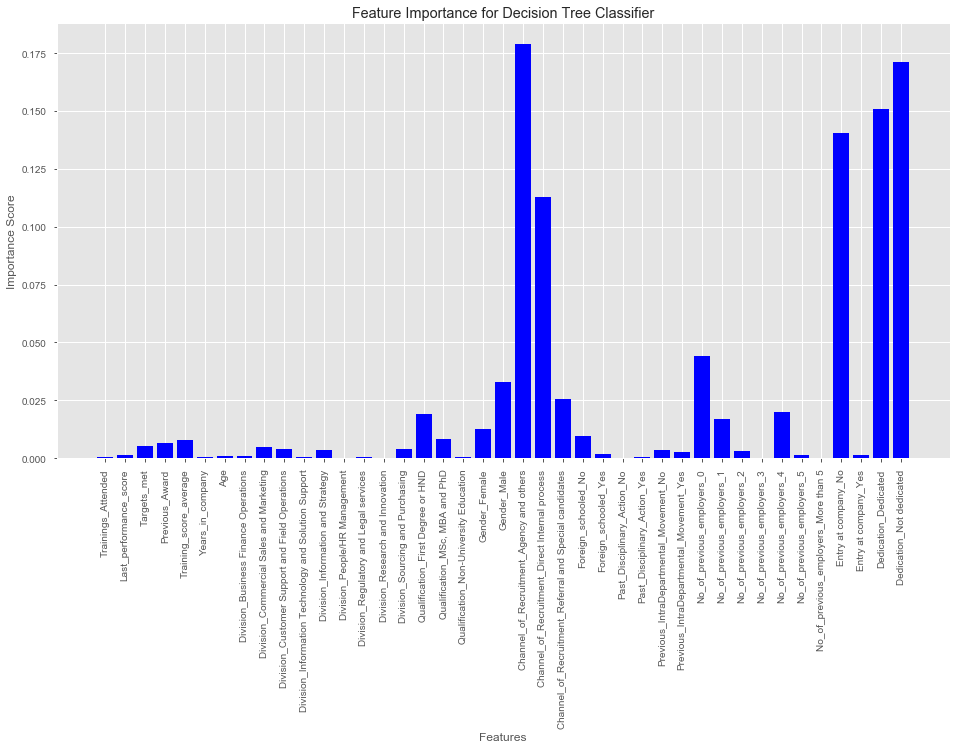

In [268]:
plt.style.use('ggplot')

dtc_col = Features
dtc_scores = decisionTree.feature_importances_

dtc_pos = [i for i, _ in enumerate(dtc_col)]

plt.figure(figsize=(16,8))
plt.bar(dtc_pos, dtc_scores, color='blue')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for Decision Tree Classifier")
plt.xticks(dtc_pos,dtc_col,rotation=90)

plt.show()  

Text(0.5, 0, 'F-Score')

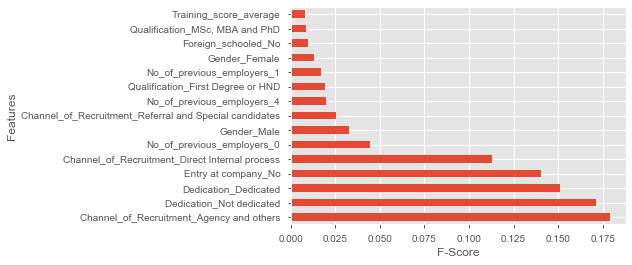

In [269]:
feat_importance = pd.Series(decisionTree.feature_importances_, index = Features)
feat_importance.nlargest(15).plot(kind='barh')
plt.ylabel('Features')
plt.xlabel('F-Score')

### Focusing on Xgboost Classifier

In [270]:
# Splitting the data into tesing and training datasets
X4_train,X4_test,y4_train,y4_test=train_test_split(X3.values,y3.values,test_size=0.2,random_state=42)

In [271]:
# Applying SMOTE to the data
X4_train,y4_train=sm.fit_sample(X4_train,y4_train)

In [272]:
import xgboost as xgb
xgboost=xgb.XGBClassifier(random_state=1,learning_rate=0.01)

#### Hyperparameter Tuning for XGBoost

In [273]:
'''gamma=[ 0.01, 0.1]
learning_rate=[0.01, 0.1]

param_grid = dict(gamma=gamma,learning_rate=learning_rate)



grid = GridSearchCV(estimator=xgboost,

                    param_grid=param_grid,

                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),

                    verbose=1,

                    n_jobs=-1, cv=5)

grid_result = grid.fit(X_train, y_train)



print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)'''

'gamma=[ 0.01, 0.1]\nlearning_rate=[0.01, 0.1]\n\nparam_grid = dict(gamma=gamma,learning_rate=learning_rate)\n\n\n\ngrid = GridSearchCV(estimator=xgboost,\n\n                    param_grid=param_grid,\n\n                    scoring=metrics.make_scorer(metrics.scorer.f1_score, average="macro"),\n\n                    verbose=1,\n\n                    n_jobs=-1, cv=5)\n\ngrid_result = grid.fit(X_train, y_train)\n\n\n\nprint(\'Best Score: \', grid_result.best_score_)\n\nprint(\'Best Params: \', grid_result.best_params_)'

#### Fitting Model Using Best Parameters from GridSearch

In [274]:
# Fitting Model Using Best Parameters from GridSearch
xgboost=xgb.XGBClassifier(random_state=42,learning_rate=0.1,gamma=0.01)
xgboost_model=xgboost.fit(X4_train, y4_train)

### Predicting

In [275]:
xgb_predict = xgboost.predict(X4_test)

### Accuracy,F1 score, Recall score, Precision Score, Confusion Matrix and Score Validation Score

In [276]:
# Checking accuracy
xgb_acc=accuracy_score(y4_test, xgb_predict)
print("The model accuracy is", xgb_acc)

# f1 score
xgb_f1= f1_score(y4_test, xgb_predict, average ='macro')
print("The F1 Score is",xgb_f1)

# Recal score
xgb_recal=recall_score(y4_test, xgb_predict,average='macro')
print("The Recal score is", xgb_recal)

# Precision score
xgb_pre=precision_score(y4_test, xgb_predict,average='macro')
print("The Precision score is", xgb_pre)


# Confusion Matrix
conf_mat = confusion_matrix(y4_test,xgb_predict)
print('Confusion matrix:\n', conf_mat)
      
      
# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(xgboost,X4_train,y4_train, cv=5))

      
print(classification_report(y4_test, xgb_predict,target_names=labels))

The model accuracy is 0.9240506329113924
The F1 Score is 0.6579198385455849
The Recal score is 0.6152579799294178
The Precision score is 0.8055929616662179
Confusion matrix:
 [[6920   76]
 [ 506  161]]
Cross_Val_Score : [0.78833482 0.97827248 0.97836153 0.97675868 0.97613535]
              precision    recall  f1-score   support

No Promotion       0.93      0.99      0.96      6996
   Promotion       0.68      0.24      0.36       667

    accuracy                           0.92      7663
   macro avg       0.81      0.62      0.66      7663
weighted avg       0.91      0.92      0.91      7663



### Plotting of Future Importance

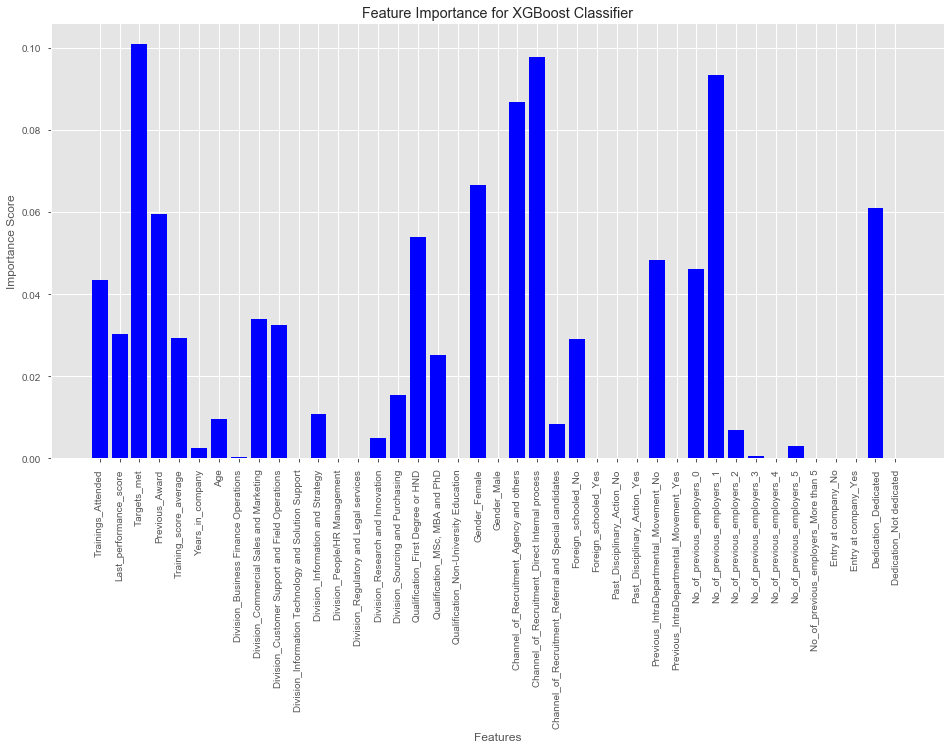

In [277]:
plt.style.use('ggplot')

xgb_col = Features
xgb_scores = xgboost_model.feature_importances_

xgb_pos = [i for i, _ in enumerate(xgb_col)]

plt.figure(figsize=(16,8))
plt.bar(xgb_pos, xgb_scores, color='blue')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance for XGBoost Classifier")
plt.xticks(xgb_pos,xgb_col,rotation=90)

plt.show()  

### ROC Curve for the Models

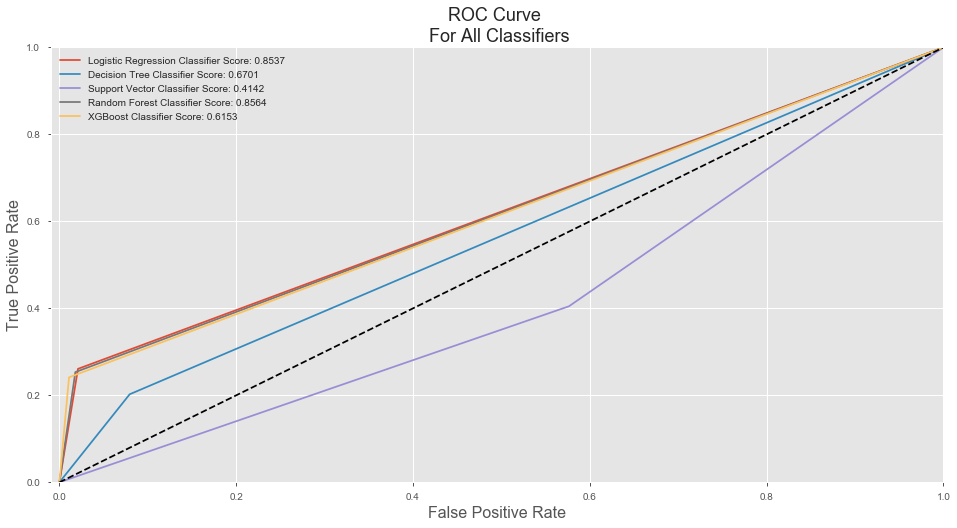

In [278]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier

log_fpr, log_tpr, log_thresold = roc_curve(y3_test, smote_pred)
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y3_test, dtc_predict)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y3_test, s_predict)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y3_test, rfc_predict)
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y4_test, xgb_predict)


def graph_roc_curve_multiple(log_fpr, log_tpr,dtc_fpr, dtc_tpr, svc_fpr, svc_tpr,rf_fpr, rf_tpr,xgb_fpr, xgb_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n For All Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y3_test, smote.predict_proba(X3_test)[:, 1])))
    plt.plot(dtc_fpr, dtc_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y3_test, decisionTree.predict_proba(X3_test)[:, 1])))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y3_test, s_predict)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y3_test, randomforest.predict_proba(X3_test)[:, 1])))
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y4_test, xgb_predict)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    #plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                #arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                #)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr,dtc_fpr, dtc_tpr, svc_fpr, svc_tpr,rf_fpr, rf_tpr,xgb_fpr, xgb_tpr)
plt.show()

## Creating a Table to Score Metrics for The Various Models

In [279]:
Summary=[['Binary Logistic Regression',log_acc,log_pre,log_recal,log_f1],
         [ 'Support Vector Machine Classifier',svm_acc,svm_pre,svm_recal,svm_f1],
         [ 'Random Forest Classifier',rf_acc,rf_pre,rf_recal,rf_f1],
         [ 'Decision Tree Classifier',dt_acc,dt_pre,dt_recal,dt_f1],
         [ 'xgBoost Classifier',xgb_acc,xgb_pre,xgb_recal,xgb_f1] 
]

Performance_Summary=pd.DataFrame(Summary)

In [280]:
#  Renaming Columns
Performance_Summary.columns=['Classifier','Accuracy','Precision','Recall','F1 Score']

#### Sorting by F1 score

In [281]:
Performance_Summary.sort_values(by='F1 Score', ascending=False)

,Classifier,Accuracy,Precision,Recall,F1 Score
4,xgBoost Classifier,0.924051,0.805593,0.615258,0.657920
2,Random Forest Classifier,0.918570,0.752646,0.617682,0.653955
0,Binary Logistic Regression,0.916482,0.737454,0.619929,0.653795
3,Decision Tree Classifier,0.858019,0.559532,0.561462,0.560465
1,Support Vector Machine Classifier,0.421897,0.472296,0.414163,0.340440


### Maximum Hard Voting Ensemble Model 

In [282]:
from sklearn.ensemble import VotingClassifier

## Now we create sub models
estimators = []

model_1 = LogisticRegression(random_state=42, solver ='saga', tol= 0.9, max_iter=200, 
                             multi_class='ovr', penalty='elasticnet', l1_ratio = 0.5)
estimators.append(('log_reg', model_1))

model_2 = DecisionTreeClassifier(random_state=42, splitter='random', 
                                 criterion='gini', max_depth=9,  max_features='auto')
estimators.append(('decision_Tree', model_2))

model_3 = RandomForestClassifier(criterion= 'gini', oob_score=True, n_estimators=200, 
                                 max_features='sqrt')
estimators.append(('random_forest', model_3))

model_4 = SVC(random_state=42, decision_function_shape ='ovr', probability = False,
              gamma='scale', kernel='sigmoid', max_iter = -1)
estimators.append(('support_vector', model_4))

model_5 = XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=200, seed = 42, 
                        eval_metric=["auc", "error",'logloss',"error@0.6"], max_depth = 9,
                        max_features='sqrt', objective='binary:logistic', reg_alpha=0.1,)
estimators.append(('xgb_model', model_5))

#### Creating the ensemble model

In [283]:
Ensemble = VotingClassifier(estimators, voting='hard')
Results = cross_val_score(Ensemble, X3_train,y3_train, cv=5)

In [284]:
# Printing the Results
print('Mean of Ensemble :', Results.mean())
print('Cross Validation Score : ', Results)

Mean of Ensemble : 0.9254674977738201
Cross Validation Score :  [0.81371327 0.9635797  0.96099733 0.95752449 0.93152271]


In [285]:
print(estimators)

[('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=200,
                   multi_class='ovr', n_jobs=None, penalty='elasticnet',
                   random_state=42, solver='saga', tol=0.9, verbose=0,
                   warm_start=False)), ('decision_Tree', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')), ('random_forest', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, 

In [295]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

voting_clf_hard = VotingClassifier(estimators=[('logistic',smote), ('Decision Tree', decisionTree), 
                                               ('Random Forest',randomforest),('SVM', supportvector),
                                               ('XGB', xgboost_model)],voting='hard')



In [ ]:
from sklearn import model_selection
from sklearn import metrics

labels = ['Logistics Regression', 'Decision Tree', 'Support Vector', 'XGBoost', 'Random Forest', 'Hard Voting Ensemble']
for (clf, label) in zip([smote,decisionTree,randomforest,supportvector,
                         xgboost_model,voting_clf_hard, labels], labels):
    scores = model_selection.cross_val_score(clf,x_Train,y_Train,cv=5,
                                             scoring=metrics.make_scorer(metrics.scorer.f1_score,average="macro"))
    print("F1 Score: $0.2f [%s]"
          %(scores.mean(),label))